In [107]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import cmath

In [153]:
dataframe = pd.read_csv("ad.csv")
#dataset = pd.DataFrame(data)
dataset = dataframe.values
'''S_0 = dataset[:,1:2]
S_1 = dataset[:,2:3]
E_0 = dataset[:,3:4]
E_1 = dataset[:,4:5]
W_0 = dataset[:,5:6]
W_1 = dataset[:,6:7]
W_2 = dataset[:,7:8]'''
data1 = pd.read_csv("s5")
#train, test = train_test_split(dataframe, test_size=0.2)
#Y_train = train.loc[:,0:1].astype(float)
#X_train = train.loc[:,2:3].astype(float)
#Y_train = dataset[:,0:1]
#X_train = dataset[:,2:3]
#print(S_1)
S_0 = []
S_1 = []
E_0 = []
E_1 = []
W_0 = []
W_1 = []
W_2 = []

In [154]:
print(dataset)
#S_0 = dataset.loc[:,1]
#print(S_0.shape)

[[  0.679976     0.5269224   -0.94684964 ...   1.03236907   0.50237871
  100.        ]
 [  0.680325     0.5269224   -0.94684964 ...   1.03236907   0.50237871
  100.        ]
 [  0.690399     0.52653891  -0.94723314 ...   1.03313606   0.50199521
  100.        ]
 ...
 [  8.670449     1.12364093  -1.34338368 ...   1.07148558   0.50161172
  100.        ]
 [  8.68044      1.12402442  -1.34223319 ...   1.07148558   0.50161172
  100.        ]
 [  8.690534     1.12402442  -1.34300018 ...   1.07186908   0.5027622
  100.        ]]


In [155]:
print(dataset[2][2])

-0.947233137


In [156]:
print(dataset.shape)
print(dataset[1][2])

(803, 17)
-0.9468496409999999


In [157]:
#kinematic parameters of baxter
#a,b,c,d,e,f,g are the angles
a_1 = 69; a_2 = 0; a_3 = 69; a_4 = 0; a_5 = 10; a_6 = 0; a_7 = 0
d_1 = 270; d_2 = 0; d_3 = 364; d_4 = 0; d_5 = 375; d_7 = 220.525
X=[]
Y=[]
Z=[]
a_11 = []
a_12 = []
a_13 = []
a_21 = []
a_22 = []
a_23 = []
a_31 = []
a_32 = []
a_33 = []

In [158]:
#forward kinematics
for i in range(0, 2317):
    a=dataset[i][1]   ;b= dataset[i][2] ;c= dataset[i][3] ;d= dataset[i][4] ;e= dataset[i][5] ;f= dataset[i][6] ;g= dataset[i][7] 
    
    R_1 = np.array([[math.cos(a), 0, -math.sin(a), a_1*math.cos(a)], [math.sin(a), 0, math.cos(a), a_1*math.sin(a)], [0, -1, 0, d_1], [0, 0, 0, 1]])
    R_2 = np.array([[math.cos(b), 0, math.sin(b), 0], [math.sin(b), 0, -math.cos(b), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
    R_3 = np.array([[math.cos(c), 0, -math.sin(c), a_3*math.cos(c)], [math.sin(c), 0, math.cos(c), a_3*math.sin(c)], [0, -1, 0, d_3], [0, 0, 0, 1]])
    R_4 = np.array([[math.cos(d), 0, math.sin(d), 0], [math.sin(d), 0, -math.cos(d), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
    R_5 = np.array([[math.cos(e), 0, -math.sin(e), a_5*math.cos(e)], [math.sin(e), 0, math.cos(e), a_5*math.sin(e)], [0, -1, 0, d_5], [0, 0, 0, 1]])
    R_6 = np.array([[math.cos(f), 0, math.sin(f), 0], [math.sin(f), 0, -math.cos(f), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
    R_7 = np.array([[math.cos(g), -math.sin(g), 0, 0], [math.sin(g), math.cos(g), 0, 0], [0, 1, 0, d_7], [0, 0, 0, 1]])

    C_M = R_1.dot(R_2).dot(R_3).dot(R_4).dot(R_5).dot(R_6).dot(R_7)
    print(C_M[1][1])
    X.append(C_M[0][3])
    Y.append(C_M[1][3])
    Z.append(C_M[2][3])
    a_11.append(C_M[0][0])
    a_12.append(C_M[0][1])
    a_13.append(C_M[0][2])
    a_21.append(C_M[1][0])
    a_22.append(C_M[1][1])
    a_23.append(C_M[1][2])
    a_31.append(C_M[2][0])
    a_32.append(C_M[2][1])
    a_33.append(C_M[2][2])
    S_0.append(a)
    S_1.append(b)
    E_0.append(c)
    E_1.append(d)
    W_0.append(e)
    W_1.append(f)
    W_2.append(g)
    '''R_1 = np.array([[math.cos(math.radians(a)), 0, -math.sin(math.radians(a)), a_1*math.cos(math.radians(a))], [math.sin(math.radians(a)), 0, math.cos(math.radians(a)), a_1*math.sin(math.radians(a))], [0, -1, 0, d_1], [0, 0, 0, 1]])
    R_2 = np.array([[math.cos(math.radians(b)), 0, math.sin(math.radians(b)), 0], [math.sin(math.radians(b)), 0, -math.cos(math.radians(b)), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
    R_3 = np.array([[math.cos(math.radians(c)), 0, -math.sin(math.radians(c)), a_3*math.cos(math.radians(c))], [math.sin(math.radians(c)), 0, math.cos(math.radians(c)), a_3*math.sin(math.radians(c))], [0, -1, 0, d_3], [0, 0, 0, 1]])
    R_4 = np.array([[math.cos(math.radians(d)), 0, math.sin(math.radians(d)), 0], [math.sin(math.radians(d)), 0, -math.cos(math.radians(d)), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
    R_5 = np.array([[math.cos(math.radians(e)), 0, -math.sin(math.radians(e)), a_5*math.cos(math.radians(e))], [math.sin(math.radians(e)), 0, math.cos(math.radians(e)), a_5*math.sin(math.radians(e))], [0, -1, 0, d_5], [0, 0, 0, 1]])
    R_6 = np.array([[math.cos(math.radians(f)), 0, math.sin(math.radians(f)), 0], [math.sin(math.radians(f)), 0, -math.cos(math.radians(f)), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
    R_7 = np.array([[math.cos(math.radians(g)), -math.sin(math.radians(g)), 0, 0], [math.sin(math.radians(g)), math.cos(math.radians(g)), 0, 0], [0, 1, 0, d_7], [0, 0, 0, 1]])
'''    

0.5032721884290833
0.5032721884290833
0.5028908156768013
0.5023203789863657
0.5019162595189528
0.5023579936025296
0.5001713439887503
0.5016650036076027
0.5019929260879212
0.5052370241076005
0.5073411335217601
0.5097165577384946
0.5097962048380577
0.5137336326672056
0.5166695604373764
0.5191119808334198
0.5229482101792118
0.524661083443806
0.5275931752013844
0.5324872231863994
0.5322292621714371
0.5362563457994277
0.537628204749682
0.5410252389902077
0.5430350515759849
0.5455587146634352
0.5460406326017442
0.5469121718303525
0.5496229090234709
0.5519432831240771
0.556369731009368
0.5580580094853311
0.5615986475808898
0.5647300994389043
0.5681880649734251
0.5700967390648759
0.5744150111263892
0.5774343343137511
0.5817713158891368
0.5813934192363804
0.5829836568386919
0.5869809194158648
0.5885229462876458
0.5909039666700027
0.5901248099871832
0.5901931851009519
0.5902304945971204
0.5911513698032818
0.5917730484849157
0.5893960141747651
0.5898870684779797
0.5900509401780276
0.5867748901609

IndexError: index 803 is out of bounds for axis 0 with size 803

In [159]:
print(X)

[357.36452868549407, 357.36452868549407, 357.2274108293217, 357.28168754509176, 357.23031169928277, 357.59944085891266, 357.3770212194542, 357.269524784173, 357.1766144135306, 357.44716601230834, 357.4080336518224, 357.5376348361859, 357.5589089169673, 357.84245404504225, 357.90696473618533, 357.9068587544485, 358.0456343996638, 358.0154585825189, 357.68158389022454, 357.9172110852744, 357.82445515135515, 357.5558359259278, 357.26819157557384, 356.935559438219, 356.76740295572586, 356.45341081474874, 356.2504914926416, 355.83906994612175, 355.2984551134115, 354.75215426817175, 354.44315156941616, 354.2329950792525, 353.3042227175546, 352.70216131649704, 352.1728152234042, 351.65383392315107, 350.6920209462206, 349.52654126565517, 349.0416171747877, 347.133766148111, 345.80238086429335, 344.4464173274084, 343.10632214030534, 341.2500611198343, 339.5689587260837, 337.38623302328807, 335.41933088637404, 333.39027660020565, 330.8821491590895, 328.233157203989, 325.87010017309666, 323.52752

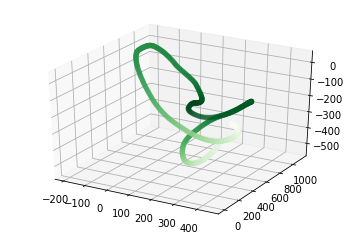

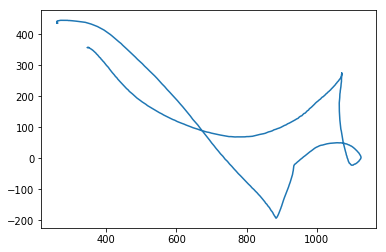

In [160]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 500, 1)
xline = np.linspace(0, 500, 1)
yline = np.linspace(0, 500, 1)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = Z
xdata = X
ydata = Y
ax.scatter3D(xdata, zdata, ydata, c=zdata, cmap='Greens');
plt.show()

plt.plot(Z, X)
plt.show()

In [161]:
#print(X)
'''X = np.array(X);
X = np.reshape(X,(X.shape[0],1))
print(X.shape);
Y = np.array(Y)
Y = np.reshape(Y,(Y.shape[0],1))
Z= np.array(Z)
X = np.reshape(Z,(Z.shape[0],1))
print(S_0.shape)'''
df = pd.DataFrame(data={"c11":S_0, "c12": S_1, "c13":E_0, "c14": E_1, "c15":W_0, "c16": W_1, "c17":W_2, "a_11": a_11, "a_12": a_12, "a_13": a_13, "a_21": a_21, "a_22": a_22, "a_23": a_23, "a_31": a_31, "a_32": a_32, "a_33": a_33, "a_x": X, "a_y":Y, "a_z": Z})
df.to_csv("./fullinverse2.csv", sep = ",", index= False)

In [162]:
print(df)

         a_11      a_12  a_13      a_21      a_22  a_23      a_31      a_32  \
0   -0.323146  1.101387   0.0  0.933426  0.503272   0.0 -0.155859  0.730523   
1   -0.323146  1.101387   0.0  0.933426  0.503272   0.0 -0.155859  0.730523   
2   -0.322939  1.101319   0.0  0.933524  0.502891   0.0 -0.155703  0.730888   
3   -0.322617  1.101797   0.0  0.933681  0.502320   0.0 -0.155426  0.730560   
4   -0.322609  1.101496   0.0  0.933762  0.501916   0.0 -0.154956  0.731291   
5   -0.322558  1.101185   0.0  0.933667  0.502358   0.0 -0.155634  0.731456   
6   -0.321059  1.101982   0.0  0.934272  0.500171   0.0 -0.155100  0.731754   
7   -0.322031  1.100513   0.0  0.933847  0.501665   0.0 -0.155645  0.732942   
8   -0.322512  1.100537   0.0  0.933737  0.501993   0.0 -0.155310  0.732681   
9   -0.324216  1.099628   0.0  0.932883  0.505237   0.0 -0.156884  0.731815   
10  -0.325604  1.098240   0.0  0.932288  0.507341   0.0 -0.157550  0.732444   
11  -0.327620  1.096447   0.0  0.931568  0.509717   

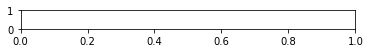

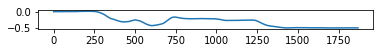

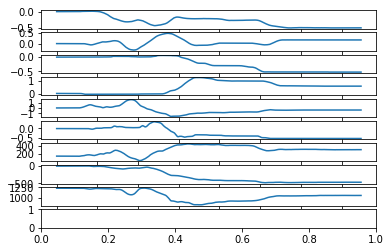

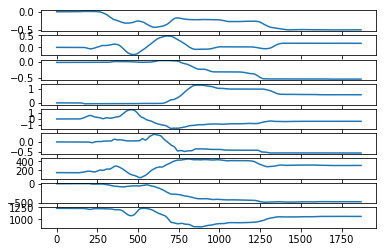

In [106]:
dataframe = pd.read_csv("fullinverse.csv")
#dataset = pd.DataFrame(data)
dataset = dataframe.values
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(dataset[:, group])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()